In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)
data_x /= np.max(data_x)

In [17]:
data_x = np.hstack((np.ones_like(data_x), data_x))

In [18]:
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]

In [19]:
def get_gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x))*np.sum(np.power(error, 2))
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, mse

In [20]:
def gradient(w, x, y):
    y_estimate = x.dot(w).flatten()
    error = (y.flatten() - y_estimate)
    gradient = -(1.0/len(x)) * error.dot(x)
    return gradient, np.pow(error, 2)

In [27]:
w = np.random.randn(2)
alpha = 0.5
tolerance = 1e-100

# Perform Gradient Descent
iterations = 1
while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

Iteration: 100 - Error: 1.6015
Iteration: 200 - Error: 1.5748
Iteration: 300 - Error: 1.5747
Iteration: 400 - Error: 1.5747
Iteration: 500 - Error: 1.5747
Iteration: 600 - Error: 1.5747
Iteration: 700 - Error: 1.5747
Iteration: 800 - Error: 1.5747
Iteration: 900 - Error: 1.5747
Iteration: 1000 - Error: 1.5747
Iteration: 1100 - Error: 1.5747
Iteration: 1200 - Error: 1.5747
Converged.


In [25]:
w

array([-1.91262048, 10.46741571])

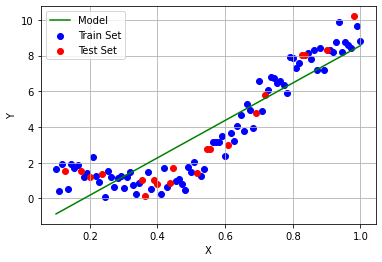

In [22]:
plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

d:\envs\xylab\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'label'
  del sys.path[0]


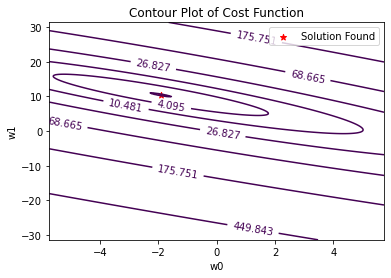

In [23]:
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')
CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')
plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()